In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 준비

In [2]:
# 패션 mnist 데이터 로드 
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [3]:
# 이미지 입력 시에는 채널에 대한 정보 필요
# 지금은 Conv2D를 적용하기 위해 채널 차원 추가 
# 흑백 이미지이므로 채널 차원 1
scaled_train = x_train.reshape(-1,28,28,1) / 255

print(scaled_train.shape)

(60000, 28, 28, 1)


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
scaled_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

# 2. 합성곱 신경망 모델 구성 

<br>

1) 합성곱 층으로 이미지에서 특징 감지 

2) 밀집층으로 클래스에 따른 분류 확률 계산 

In [6]:
model = keras.Sequential()

# 1. 합성곱 층 추가 
model.add(keras.layers.Conv2D(filters=32, # 임의 설정 
                              kernel_size=3, # 실제 크기는 (3,3,1)
                              activation='relu',
                              padding='same',
                              input_shape=(28,28,1)))
                              # 처음 만나는 층이기 떄문에 input_shape 추가

- 패션 MNIST 이미지가 (28, 28) 크기에 sampe padding 적용, 32개의 필터 사용 
    - 출력되는 특성맵 크기는 --> (28, 28, 32)

In [7]:
# 2. 풀링 층 추가 
model.add(keras.layers.MaxPool2D(2)) # pool_size

- (2, 2) 크기의 커널을 이용하여 풀링을 적용해서 특성맵의 크기가 절반으로 줄어들고 특성맵의 깊이(개수)는 그대로 
    - 출력되는 특성맵의 크기는 --> (14, 14, 32)

In [8]:
# 3. 두 번째 합성곱 층 & 풀링 층 추가 
model.add(keras.layers.Conv2D(64,
                             kernel_size=3,
                             activation='relu',
                             padding='same'))
# 합성곱 층이 깊어질수록 필터의 개수를 늘림.

# 4.
model.add(keras.layers.MaxPool2D(2))

- (14, 14) 크기에 same padding, 64개의 필터 사용 
    - 출력되는 특성맵의 크기 --> (14, 14, 64)
    
- (2, 2) 크기의 커널 이용하여 풀링 
    - 출력되는 특성맵의 크기 --> (7, 7, 64)

In [9]:
# 5.
# 3차원 특성맵을 일렬로 펼침 
# 10개의 뉴런을 가진 밀집층에서 확률을 계산하기 때문에 
model.add(keras.layers.Flatten())
# 1차원으로 늘어뜨린다고 해서 정보가 사라지지 않음. (약간은 악영향)

In [10]:
# 6.
# fc1 : fully conncected layer 1 (완전연결층 1)
# 밀집 은닉층을 하나 더 추가 후, 드롭아웃을 넣어 과대적합을 방지하고 성능 개선 
model.add(keras.layers.Dense(100,  # units  
                             activation='relu'))
# 64개의 특성을 100개로 정리 

# 7.
model.add(keras.layers.Dropout(0.4))
# 학습 시 60%만 가지고 학습

In [11]:
# 8. 출력층 (fc2)
# 10개의 클래스로 분류하는 다중 분류
model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
# 모델 구조 확인 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

- 파라미터 개수 
    - 첫 번째 합성곱 층 
        - 필터 크기 : (3, 3, 1)
        - 필터 개수 : 32
        - (3 * 3 * 1) * 32 + (1 * 32) = 320
        
    - 두 번째 합성곱 층 
        - 필터 크기 : (3, 3, 32)
        - 필터 개수 : 64
        - (3 * 3 * 32) * 64 + (1 * 64) = 18496
        
    - 밀집 은닉층 
        - Flatten 층에서 (3136,) 크기의 배열 전달 (7\*7\*64)
        - (3136 * 100) + (1 * 100) = 313700
        
    - 출력층 
        - 밀집 은닉층에서 (100,) 크기의 배열 전달 
        - (100 * 10) + (1 * 10) = 1010
        
    - 320 + 18496 + 313700 + 1010 = 333,526

# 3. 모델 훈련 

<br>

- 옵티마이저 : Adam
- Callback 함수 : ModelCheckpoint, EarlyStopping

In [15]:
"""
checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path) # 폴더경로 (파일명 포함 x)

# 모델 저장 폴더 존재 유무 확인 및 없을 시 생성 
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True) # 폴더 존재해도 에러메시지 출력 x
    print("{} -- Folder create complete \n".format(checkpoint_dir))
"""

checkpoint_cb = keras.callbacks.ModelCheckpoint('./model/best-cnn-model.h5', # 위의 checkpoint_path로 설정 가능 
                                               save_best_only=True)
# monitor='val_loss'
# verbose
#  - 0: silent mode (디폴트)
#  - 1: 모델 저장 시, 메시지 표시
# save_weights_only=False

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                 restore_best_weights=True)
# monitor='val_loss' : 검증 손실 기준 판단 
# min_delta=0 : (손실or정확도) 최소 변화값 

In [16]:
model.compile(optimizer='adam', # keras.optimizers.Adam(1e-4)
             loss='sparse_categorical_crossentropy', # tf.keras.losses.CategoricalCrossEntropy 
             metrics='accuracy') # [tf.keras.metrics.CategoricalAccuracy(name='accuracy')]

histroy = model.fit(scaled_train, y_train,
                   epochs=20,
                   validation_split=0.2,
                   callbacks=[checkpoint_cb,early_stopping_cb])
# batch_size=BATCH_SIZE
# - 디폴트 None (32)
# Number of samples per gradient update

Epoch 1/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.5359 - accuracy: 0.8069 - val_loss: 0.3372 - val_accuracy: 0.8737
Epoch 2/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3570 - accuracy: 0.8726 - val_loss: 0.3001 - val_accuracy: 0.8896
Epoch 3/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.3054 - accuracy: 0.8897 - val_loss: 0.2635 - val_accuracy: 0.8988
Epoch 4/20
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2732 - accuracy: 0.9007 - val_loss: 0.2562 - val_accuracy: 0.9059
Epoch 5/20
1500/1500 [==============================] - 58s 38ms/step - loss: 0.2518 - accuracy: 0.9080 - val_loss: 0.2338 - val_accuracy: 0.9135
Epoch 6/20
1500/1500 [==============================] - 37s 24ms/step - loss: 0.2300 - accuracy: 0.9168 - val_loss: 0.2362 - val_accuracy: 0.9136
Epoch 7/20
1500/1500 [==============================] - 45s 30ms/step - loss: 0.2141 - accuracy: 0.9212 - val_loss: 0.2268 -

- CNN 층 쓰면 3 epoch만에 val_loss가 0.2대로 떨어짐 
    - 이미지 분류에 있어서, CNN은 강력함. 

# 4. 훈련 로그 확인 

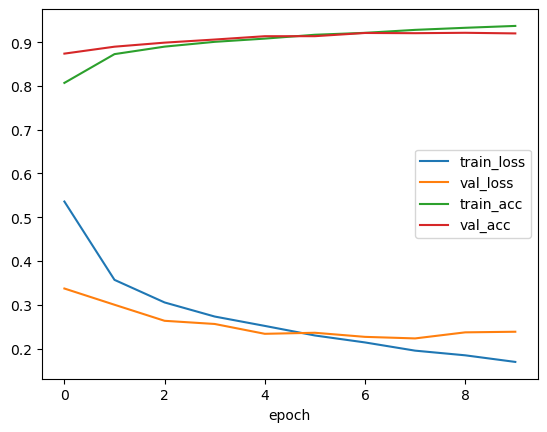

In [19]:
"""
훈련 로그 시각화 함수 

def plot_graphs(history, string):
    plt.plot(history.history[string]) # 학습 손실 or 정확도 
    plt.plot(history.history['val_'+string], '') # 검증 손실 or 정확도 
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
"""

plt.figure()

# history 오타... ㅜ_ㅜ
plt.plot(histroy.history['loss'], label='train_loss')
plt.plot(histroy.history['val_loss'], label='val_loss')
plt.plot(histroy.history['accuracy'], label='train_acc')
plt.plot(histroy.history['val_accuracy'], label='val_acc')

plt.xlabel('epoch')
plt.legend()

plt.show()

# 5. 모델 성능 검증

In [20]:
scaled_test = x_test.reshape(-1,28,28,1) / 255

model.evaluate(scaled_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2431 - accuracy: 0.9163


[0.2431458979845047, 0.9162999987602234]

# 6. 예측 

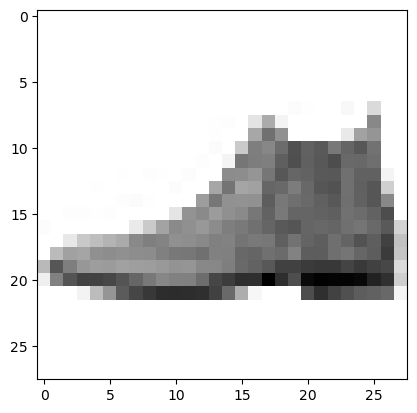

In [21]:
# 0번째 테스트 데이터 시각화 (앵클부츠)
plt.imshow(scaled_test[0].reshape(28,28), cmap='gray_r')
plt.show()

In [23]:
# (1, 28, 28, 1) 로 [[0]] 해줘야 한다는 점 주의! 
preds = model.predict(scaled_test[[0]])
print(preds)

1/1 [==============================] - 0s 55ms/step
[[9.5606252e-09 3.9299342e-09 5.8407018e-10 2.2041641e-10 5.0870461e-11
  1.4525291e-05 5.5055778e-09 1.4462247e-05 1.1608617e-10 9.9997103e-01]]


In [25]:
scaled_test[[0]].shape

(1, 28, 28, 1)

In [26]:
scaled_test[0].shape

(28, 28, 1)

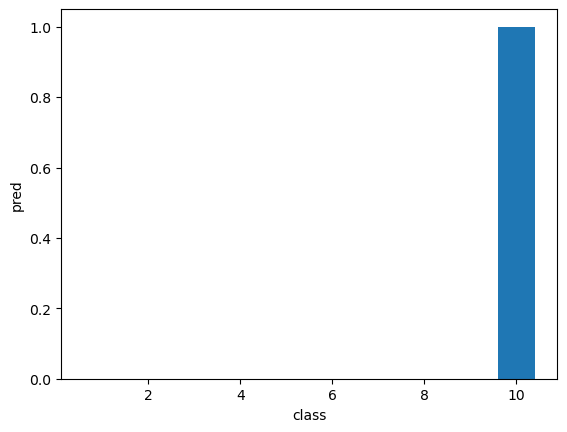

In [27]:
plt.figure()
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('pred')
plt.show()

In [28]:
# 레이블 리스트
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', 
           '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

print(classes[np.argmax(preds)])
print(classes[y_test[0]])

앵클부츠
앵클부츠


- 샌달, 스니커즈와 비슷하다는 점도 찾아낼 수 있음을 확인 가능 (1.4525291e-05)